In [1]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
H_s, H_jw, mod_H_jw, phi, s, t, vi, vo, va, r1, r2, r3, r4, c, Hs, w = symbols("H_s H_jw |H_jw| phi s t vi vo va r1 r2 r3 r4 c Hs w")

eq1 = Eq((va - vi)*s*c + (va - vo)*(1/r1) + (va - vo)*s*c, 0)
eq1

Eq(c*s*(va - vi) + c*s*(va - vo) + (va - vo)/r1, 0)

In [3]:
eq2 = Eq(va, vo*((1/r2)+s*c)/(s*c))
eq2

Eq(va, vo*(c*s + 1/r2)/(c*s))

In [4]:
sol = linsolve([eq1, eq2], (vo,va))
sol

{(c**2*r1*r2*s**2*vi/(c**2*r1*r2*s**2 + 2*c*r1*s + 1), (c**2*r1*r2*s**2*vi + c*r1*s*vi)/(c**2*r1*r2*s**2 + 2*c*r1*s + 1))}

In [5]:
Vo = sol.args[0][0]

H1 = Vo/vi 
Eq(H_s, H1)

Eq(H_s, c**2*r1*r2*s**2/(c**2*r1*r2*s**2 + 2*c*r1*s + 1))

In [6]:
H2 = H1.subs({r1: r3, r2: r4})
H2

c**2*r3*r4*s**2/(c**2*r3*r4*s**2 + 2*c*r3*s + 1)

In [7]:
H_s = H1*H2
H_s

c**4*r1*r2*r3*r4*s**4/((c**2*r1*r2*s**2 + 2*c*r1*s + 1)*(c**2*r3*r4*s**2 + 2*c*r3*s + 1))

In [8]:
H_s_subs = H_s.subs({c:100e-9, r1 : 6088.5577,r2:41609.12,r3:14698.4577,r4:17233.88197})

In [9]:
# Substituindo s = jw

Hjw = H_s.subs(s, I*w)
Eq(H_jw,Hjw)

Eq(H_jw, c**4*r1*r2*r3*r4*w**4/((-c**2*r1*r2*w**2 + 2*I*c*r1*w + 1)*(-c**2*r3*r4*w**2 + 2*I*c*r3*w + 1)))

In [10]:
#Hjw_subs = Hjw.subs({c:100e-9, r1 : 0.383, r2:2.614,r3:0.92353,r4:1.0828})
Hjw_subs = Hjw.subs({c:100e-9, r1 : 6088.5577,r2:41609.12,r3:14698.4577,r4:17233.88197})
Hjw_subs

6.41738120745097e-12*w**4/((-2.53339527966224e-6*w**2 + 0.00121771154*I*w + 1)*(-2.53311485142838e-6*w**2 + 0.00293969154*I*w + 1))

In [11]:
# calcular o módulo e o argumento em cada frequência

def calcular_respostas(frequencias):
    resultados = []
    for i, freq in enumerate(frequencias):  # Usando enumerate para indexar corretamente
        omega = 2 * pi * freq
        Mod = abs(Hjw_subs)
        Arg = deg(arg(Hjw_subs))
        Mod_value = float(Mod.subs(w, omega))
        Arg_value = float(Arg.subs(w, omega))

        resultados.append({
            'Frequência (Hz)': freq,
            'Módulo_Python': Mod_value,
            'Argumento_Python (Deg)': Arg_value,
        })

    return resultados

# Lista de frequencias em Hz
# frequencias = [0.01, 0.1, 1, 10, 100, 1000]
frequencias = np.logspace(-2, 5, num=100)


resultados = calcular_respostas(frequencias)
df = pd.DataFrame(resultados)
df

,Frequência (Hz),Módulo_Python,Argumento_Python (Deg)
0,0.010000,1.000178e-16,-0.014967
1,0.011768,1.918252e-16,-0.017613
2,0.013849,3.679035e-16,-0.020727
3,0.016298,7.056058e-16,-0.024392
4,0.019179,1.353289e-15,-0.028705
...,...,...,...
95,52140.082880,1.000000e+00,0.287028
96,61359.072734,1.000000e+00,0.243903
97,72208.090184,1.000000e+00,0.207257
98,84975.343591,1.000000e+00,0.176118


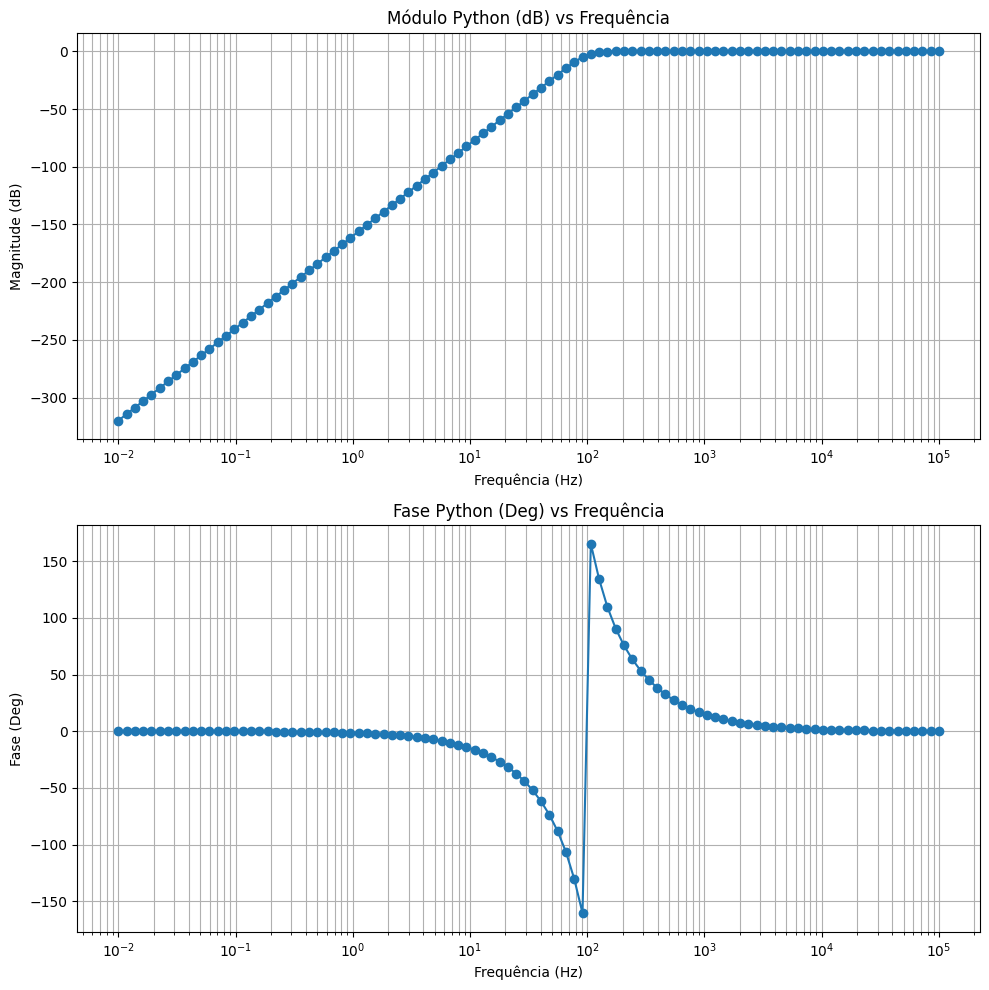

In [12]:
# Convertendo módulo para dB 
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])

# Plotando o diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Módulo em dB
axs[0].semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-')
axs[0].set_title('Módulo Python (dB) vs Frequência')
axs[0].set_xlabel('Frequência (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid(True, which="both", ls="-")

# Fase em graus
axs[1].semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-')
axs[1].set_title('Fase Python (Deg) vs Frequência')
axs[1].set_xlabel('Frequência (Hz)')
axs[1].set_ylabel('Fase (Deg)')
axs[1].grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()